In [ ]:
from google.colab import files
uploaded = files.upload()

Saving OlympicHistoryAthletes.csv to OlympicHistoryAthletes.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving noc_regions.csv to noc_regions.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("OlympicHistoryAthletes.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
regions = pd.read_csv("noc_regions.csv")

In [ ]:
merged = pd.merge(df, regions, on='NOC', how='left')
merged.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [ ]:
merged['Medals'] = merged.Medal.fillna(0)
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Medals
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0


In [ ]:
data = pd.DataFrame({'country':['Tuvalu','Kiribati','Marshall Islands','Palau','Micronesia, Federated States of',' São Tomé and Príncipe',' Tonga',' Dominica',' St. Vincent and the Grenadines',' Samoa'],
                      'GDP':[42,184,220,291,381,430,488,593,856,905],
                      'Medals':[0,0,0,0,0,0,0,0,0,0]})
data

,country,GDP,Medals
0,Tuvalu,42,0
1,Kiribati,184,0
2,Marshall Islands,220,0
3,Palau,291,0
4,"Micronesia, Federated States of",381,0
5,São Tomé and Príncipe,430,0
6,Tonga,488,0
7,Dominica,593,0
8,St. Vincent and the Grenadines,856,0
9,Samoa,905,0


In [ ]:
Medals = merged.dropna(subset=["Medal"])
Medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN


In [ ]:
len(Medals)

39783

In [ ]:
merged.region.value_counts().reset_index(name='Medals')


,index,Medals
175,Saint Vincent,42
176,Saint Kitts,42
177,Aruba,42
178,Chad,41
179,Cook Islands,40
180,Equatorial Guinea,40
181,Burundi,39
182,Djibouti,38
183,American Samoa,37
184,Bhutan,36


Text(0.5, 1, 'Medals per Country')

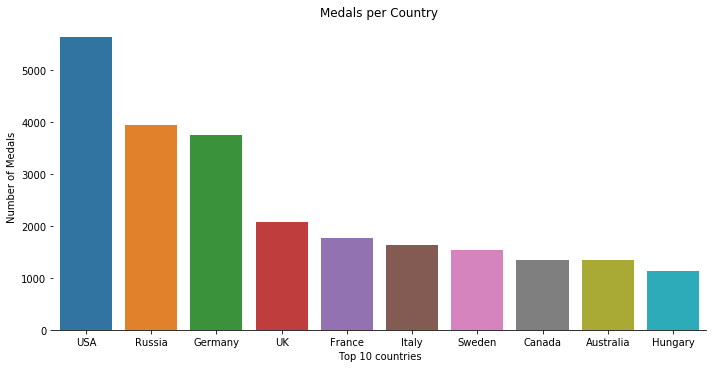

In [ ]:
TotalMedals = Medals.region.value_counts().reset_index(name='Medal').head(10)
g = sns.catplot(x="index", y="Medal", data=TotalMedals,
                kind="bar", aspect = 2)
g.despine(left=True)
g.set_xlabels("Top 10 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

In [ ]:
TotalMedals.head()

,index,Medal
0,USA,5637
1,Russia,3947
2,Germany,3756
3,UK,2068
4,France,1777


In [ ]:
goldMedals = merged[(merged.Medal == 'Gold')]
goldMedals.region.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575
5,France,501
6,Sweden,479
7,Canada,463
8,Hungary,432
9,Norway,378


Text(0.5, 1, 'Gold Medals per Country')

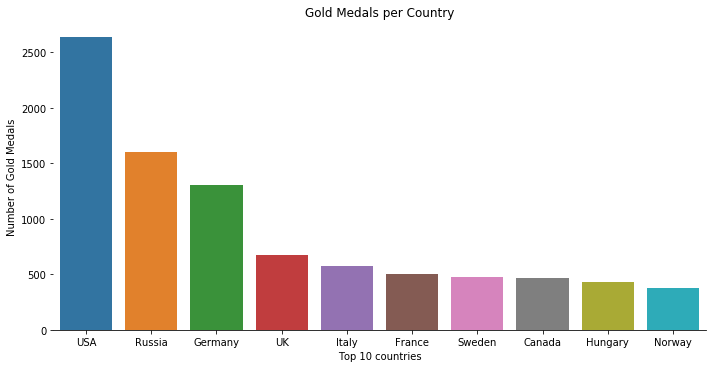

In [ ]:
TotalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(10)
g = sns.catplot(x="index", y="Medal", data=TotalGoldMedals,
                aspect=2, kind="bar")
g.despine(left=True)
g.set_xlabels("Top 10 countries")
g.set_ylabels("Number of Gold Medals")
plt.title('Gold Medals per Country')

In [ ]:
MedalsUSA = Medals.loc[Medals['NOC'] == 'USA']

In [ ]:
MedalsUSA.Year.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,1904,394
1,1984,361
2,2008,317
3,2016,264
4,2004,263
5,1996,259
6,2012,248
7,2000,242
8,1992,238
9,1932,223


In [ ]:
MedalsUSAYear = MedalsUSA.Year.value_counts().reset_index(name='Medal')
MedalsUSAYears = MedalsUSAYear.sort_index(axis=0, ascending=True, by='index')
MedalsUSAYears.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,index,Medal
33,1896,20
28,1900,63
0,1904,394
32,1906,24
26,1908,65


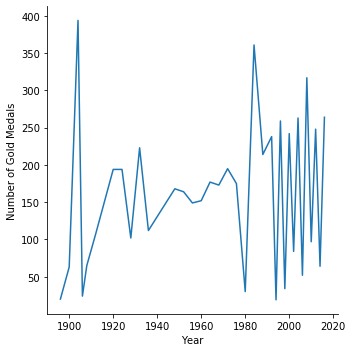

In [ ]:

g = sns.relplot(x="index", y="Medal", kind='line',data=MedalsUSAYears,legend='full'
                 )
g.set_xlabels("Year")
g.set_ylabels("Number of Gold Medals")

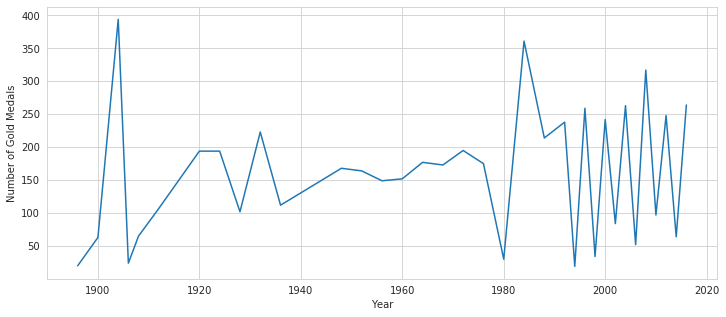

In [ ]:
sns.set_style("whitegrid")
x = MedalsUSAYears['index']
y = MedalsUSAYears['Medal']

fig = plt.figure()

plt.plot(x, y,ms=4,)
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.show()

In [ ]:
MedalsUSA.Event.value_counts().reset_index(name='Medal').head(10)

In [ ]:
goldMedalsUSA.Sport.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,Athletics,1080
1,Swimming,1078
2,Rowing,375
3,Basketball,341
4,Ice Hockey,276
5,Gymnastics,194
6,Shooting,193
7,Water Polo,150
8,Diving,140
9,Sailing,140


In [ ]:
sns.relplot(x="index", y="Medal", kind="line", data=data, ci=None)

Text(0.5, 1, 'Gold Medals per Sport')

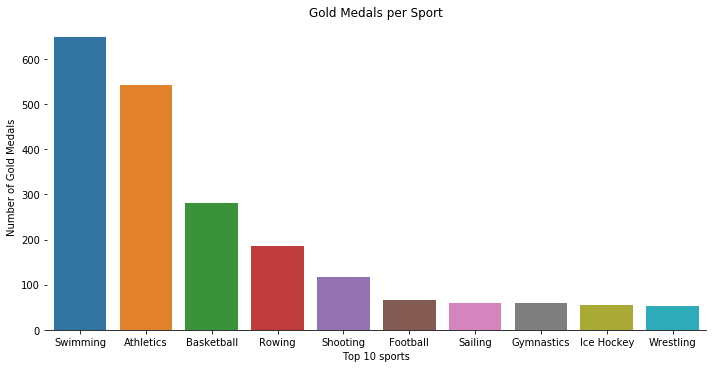

In [ ]:
GoldMedalsSport = goldMedalsUSA.Sport.value_counts().reset_index(name='Medal').head(10)
g = sns.catplot(x="index", y="Medal", data=GoldMedalsSport,
                aspect=2, kind="bar")
g.despine(left=True)
g.set_xlabels("Top 10 sports")
g.set_ylabels("Number of Gold Medals")
plt.title('Gold Medals per Sport')

In [ ]:
goldMedalsRU = goldMedals.loc[goldMedals['NOC'] == 'RUS']

In [ ]:
goldMedalsRU.Sport.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,Synchronized Swimming,54
1,Rhythmic Gymnastics,34
2,Fencing,33
3,Figure Skating,32
4,Handball,30
5,Wrestling,29
6,Athletics,29
7,Cross Country Skiing,23
8,Biathlon,22
9,Gymnastics,16


In [ ]:
GoldMedalsSportRU = goldMedalsRU.Sport.value_counts().reset_index(name='Medal').head(10)
g = sns.catplot(x="index", y="Medal", data=GoldMedalsSport,
                aspect=2, kind="bar")
g.despine(left=True)
g.set_xlabels("Russia Top 10 sports")
g.set_ylabels("Number of Gold Medals")
plt.title('Gold Medals per Sport')

In [ ]:
Medals = pd.concat([Medals,pd.get_dummies(Medals.Medal)],axis=1)

In [ ]:
dfusa = Medals[Medals.NOC == 'USA']
len(dfusa)

5637

In [ ]:
dfusayear = dfusa.groupby(['Year','Event'],as_index=False).max()

In [ ]:
dfusayear = dfusayear.groupby(['Year'],as_index=False).sum()

In [ ]:
plt.plot(dfusayear.Year,dfusayear.Medal)
plt.plot(dfusayear.Year,dfusayear.allmedals,'bo')
plt.yticks(range(0,8))
plt.xticks(range(1900,2018,4))
plt.show()

In [ ]:
plt.plot(dfusayear.Year,dfusayear.Medal)